In [1]:
import pandas as pd
import numpy as np
base_path_static = "/kaggle/input/ais-data/ais_static/"
base_path_dynamic = "/kaggle/input/ais-data/unipi_ais_dynamic_2017/"

df_static = pd.read_csv("/kaggle/input/ais-data/ais_static/ais_static/unipi_ais_static.csv")
df_dynamic = pd.read_csv("/kaggle/input/ais-data/unipi_ais_dynamic_2017/unipi_ais_dynamic_aug2017.csv")


df_static.head();
df_dynamic.head();

In [2]:
dfStatic = pd.read_csv("/kaggle/input/ais-data/ais_static/ais_static/unipi_ais_static.csv")
dfStaticData = dfStatic[dfStatic["shiptype"]==30]
dfStaticData

vessel_id  country  shiptype
15    74ac87030b496c05de9345ec9755e655519b06877c67f1...  Albania      30.0
55    3ba5140d6a550127370721360b0e9e947abba3724cbe75...   Cyprus      30.0
666   b1f9e96d1414fbf6f11279e687871960a7444c3d85f765...   Greece      30.0
717   6403fd5dd746b526e74365cb0f22cdc2357f696ab0521e...   Greece      30.0
723   741ef74ef59b3cefe68be41c38cdcb63d7e6617bc2737e...   Greece      30.0
...                                                 ...      ...       ...
6048  afe0d0d9700f82e224df0be80a4b0b443a9271e811e9e6...   Turkey      30.0
6122  932e026b99cdc5594d2053048a4237ba31e940730b3dd9...   Greece      30.0
6135  e4dc62105e2e5f26cd3cf3b5e24117e8f1e520d278ba09...   Greece      30.0
6160  78d3c8fd2cc8d6f1a58c31c44a64dfeba5c17b5797aca0...   Greece      30.0
6171  bef1c3fab845799cdb64bbe6a1fdf67d263755351c23d9...   Greece      30.0

[103 rows x 3 columns]

In [3]:
df_dynamic.head()

t                                          vessel_id  \
0  1501558769000  8035355114afa4ee3dfbc03dbff92823857ee6c9111da0...   
1  1501558769000  559b1ba2e3a3863b0b033cefbe82c8cc4e9d50aac4c5da...   
2  1501558770000  98bb36c7c07ec0e180c1673d1ef5ad0960848c6488d936...   
3  1501558770000  8406aa01dbd09a832e2a9825f28f900e03c718f86c1665...   
4  1501558770000  4f012f65d681779bef035d66e47131a159db57a0c1d538...   

         lon        lat  heading  speed  course  
0  23.607978  37.867208    299.0    7.6   292.9  
1  23.647700  37.932825    139.0    0.0   304.9  
2  23.562000  37.901333    351.0    0.1   292.0  
3  23.610117  37.957467      NaN    0.0   308.0  
4  23.536647  37.872152     16.0    0.2   338.0

In [4]:
# for vesselId in dfStaticData['vessel_id']:
#     for vslId in df_dynamic['vessel_id']:
#         if vesselId==vslId:
#             print(vesselId)
#             break
#         else:
#             print(vesselId)

In [5]:
single_container_vessel_id = "ec23500ffdc9246f92079eb872ab73e0d83c8b1d2d36e0bf2486e4481a5f0764"
dfSingleContainer = df_dynamic[df_dynamic['vessel_id']==single_container_vessel_id]
dfSingleContainer.count()

t            3619
vessel_id    3619
lon          3619
lat          3619
heading      3619
speed        3619
course       3617
dtype: int64

In [6]:
max(dfSingleContainer['speed'])

10.7

In [7]:
pip install movingpandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 46.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
#from keplergl import KeplerGl
import geopandas as gpd
import movingpandas as mpd
from datetime import datetime, timedelta
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<AxesSubplot:>

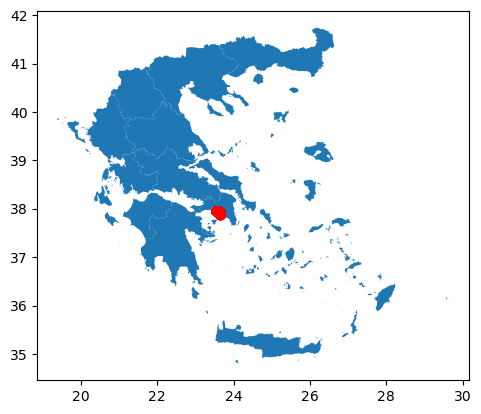

In [9]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import matplotlib.pyplot as plt 
import contextily as ctx
import geoplot

fig,ax1 = plt.subplots()
area_gdf = gpd.read_file("/kaggle/input/piraeusdatasetgeofiles/regions.shp", layer='regions')
area_gdf = area_gdf.to_crs("EPSG:4326")
trajectory_gdf = gpd.GeoDataFrame(dfSingleContainer,geometry=gpd.points_from_xy(dfSingleContainer.lon,dfSingleContainer.lat,crs=area_gdf.crs))
trajectory_gdf = trajectory_gdf.to_crs(area_gdf.crs)
area_gdf.plot(ax=ax1)
trajectory_gdf.plot(ax=ax1,color='red')
#complete_map.plot()

In [10]:
harbour_gdf = gpd.read_file("/kaggle/input/piraeusdatasetgeofiles/harbours.shp", layer='harbours')
islands_gdf = gpd.read_file("/kaggle/input/piraeusdatasetgeofiles/islands.shp", layer='islands')
piraeus_port_gdf = gpd.read_file("/kaggle/input/piraeusdatasetgeofiles/piraeus_port.shp", layer='piraeus_port')
received_location_gdf = gpd.read_file("/kaggle/input/piraeusdatasetgeofiles/receiver_location.shp", layer='receiver_location')
harbour_gdf = harbour_gdf.to_crs(area_gdf.crs)
islands_gdf = islands_gdf.to_crs(area_gdf.crs)
piraeus_port_gdf = piraeus_port_gdf.to_crs(area_gdf.crs)
received_location_gdf = received_location_gdf.to_crs(area_gdf.crs)

#complete_gdf  = area_gdf.append(harbour_gdf)#.append(islands_gdf).append(piraeus_port_gdf).append(received_location_gdf)
complete_gdf  = area_gdf.append(trajectory_gdf)#.append(saronic_territorial_waters_gdf)

In [11]:
type(trajectory_gdf)
trajectory_gdf.head()
trajectory_gdf.set_index('t',inplace=True)
trajectory_gdf.index = pd.to_datetime(trajectory_gdf.index,unit='ms')

In [12]:
trajectory_single_track = mpd.Trajectory(trajectory_gdf,'vessel_id')

<AxesSubplot:>

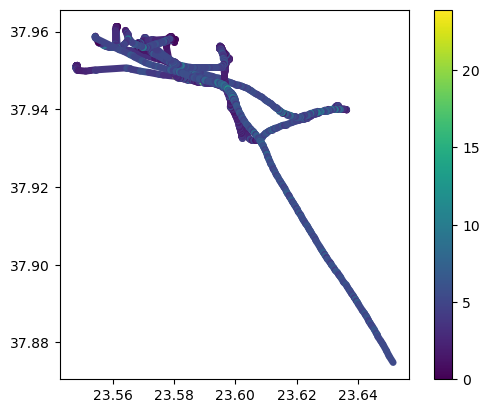

In [13]:
trajectory_single_track.add_speed(overwrite=True)
trajectory_single_track.plot(column='speed',linewidth=5,legend=True,capstyle='round')

In [14]:
trajectory_single_track.add_acceleration(overwrite=True)

In [15]:
splits = mpd.StopSplitter(trajectory_single_track).split(min_duration=timedelta(minutes=1), max_diameter=30, min_length=500)
for traj in splits:
    print(traj)

Trajectory vessel_id_2017-08-01 02:22:03 (2017-08-01 02:22:03 to 2017-08-01 02:55:33) | Size: 156 | Length: 5385.1m
Bounds: (23.547835, 37.94083, 23.5998333333333, 37.95133)
LINESTRING (23.548165 37.9511666666667, 23.54833166666669 37.95133, 23.548165 37.9511666666667, 23.5
Trajectory vessel_id_2017-08-01 03:18:53 (2017-08-01 03:18:53 to 2017-08-01 03:38:13) | Size: 173 | Length: 3404.0m
Bounds: (23.602665, 37.932, 23.634501666666694, 37.941)
LINESTRING (23.602665 37.9345, 23.602665 37.9343333333333, 23.6028316666667 37.9343333333333, 23.602
Trajectory vessel_id_2017-08-01 03:44:42 (2017-08-01 03:44:42 to 2017-08-01 04:34:46) | Size: 160 | Length: 7784.3m
Bounds: (23.561165, 37.93799666666671, 23.6363316666667, 37.9613333333333)
LINESTRING (23.6359983333333 37.94, 23.6363316666667 37.93983, 23.6363316666667 37.93983, 23.6363316
Trajectory vessel_id_2017-08-01 05:45:52 (2017-08-01 05:45:52 to 2017-08-01 06:02:29) | Size: 29 | Length: 2291.8m
Bounds: (23.560831666666694, 37.9521633333332

In [16]:
df_static = df_static.set_index('vessel_id')

In [17]:
df_static.index.nunique()

6228

In [18]:
len(df_static)

6230

In [19]:
df_static

country  shiptype
vessel_id                                                                   
4639feb302547e3903ce3c3f51424fcad13a92508ab3dae...             NaN       NaN
2c46b2c29086c03cb774fa3fb0d9f4c22a793eb7e740321...         Albania      52.0
65d24830f3884827d091152b8422c3ad125ce16a87a4ca1...         Albania      40.0
9c85b935e6adfb37a058d42700148ebac634af543981883...         Albania      70.0
d3fc29d4cbbfc1c47bc8ad7e5753086f6c611c5447cbb5f...         Albania      52.0
...                                                            ...       ...
e4c879416ed1e59e778b0541017322c75b7244fce4d5f5a...           Malta      82.0
98f3ce5cb91bd2bc49f1e85b899535f86b7aa889629acc4...     Marshall Is      80.0
d775d1e80b5eb04f1eea5268debb808568a31211ebbe9c4...           Malta      90.0
e8d6d814b76b81d24d9b9a343d118a84eb1514764d1efde...  United Kingdom      37.0
d47290fd6bdf2b7411d17b9d1fd1dab6088a2d5dc3c1384...          Greece      70.0

[6230 rows x 2 columns]

In [20]:
df_dynamic.describe()

t           lon           lat       heading         speed  \
count  8.012368e+06  8.012368e+06  8.012368e+06  4.543267e+06  7.995535e+06   
mean   1.502542e+12  2.361212e+01  3.793245e+01  1.904502e+02  3.442279e+00   
std    5.945941e+08  4.165025e-02  3.001278e-02  1.073607e+02  7.083191e+00   
min    1.501535e+12  2.303515e+01  3.753265e+01  0.000000e+00  0.000000e+00   
25%    1.502164e+12  2.358540e+01  3.792967e+01  1.090000e+02  0.000000e+00   
50%    1.502426e+12  2.361351e+01  3.794074e+01  1.890000e+02  0.000000e+00   
75%    1.502965e+12  2.364155e+01  3.795052e+01  2.850000e+02  3.500000e+00   
max    1.503776e+12  2.377197e+01  3.804117e+01  3.590000e+02  1.022000e+02   

             course  
count  7.303113e+06  
mean   1.677319e+02  
std    1.156283e+02  
min    0.000000e+00  
25%    5.200000e+01  
50%    1.763000e+02  
75%    2.687000e+02  
max    3.599000e+02

In [21]:
df_static.head()

country  shiptype
vessel_id                                                            
4639feb302547e3903ce3c3f51424fcad13a92508ab3dae...      NaN       NaN
2c46b2c29086c03cb774fa3fb0d9f4c22a793eb7e740321...  Albania      52.0
65d24830f3884827d091152b8422c3ad125ce16a87a4ca1...  Albania      40.0
9c85b935e6adfb37a058d42700148ebac634af543981883...  Albania      70.0
d3fc29d4cbbfc1c47bc8ad7e5753086f6c611c5447cbb5f...  Albania      52.0

In [22]:
listFishing = []
dfFishingShip = df_static[df_static['shiptype']==30]
dfFishingShip.head()

listCargo = []
dfCargo = df_static[df_static['shiptype']==60]
dfCargo.head()

country  shiptype
vessel_id                                                            
6f9698e0ee0a0eba4b9bf2a20a6493176ecfd5825182054...  Albania      60.0
f52f81d515ebe315be7b507a1c158271af5244d58b5f45e...  Belgium      60.0
1ac48b46dce12db658da9b7b2cc4fefecef4a0524a0ceba...   Cyprus      60.0
b284d66fb71944f54acff54b5fef06aad53ed1305a9e45a...   Cyprus      60.0
e846f0625bbef839e5e83fc3140dcf856e2b4b55b2c79e6...   Cyprus      60.0

In [23]:
print(len(dfFishingShip))
print(len(dfCargo))

103
284


In [24]:
listFishingShip =[]
for ship_name in dfFishingShip.index:
    df_status = df_dynamic[df_dynamic['vessel_id']==ship_name]
    if len(df_status):
        print('present')
        listFishingShip.append(ship_name)
    else:
        continue        

# print(listFishingShip)

present
present
present
present
present
present
present
present
present
present
present
present


In [25]:
countCargo = 0
listCargoShip =[]
for ship_name in dfCargo.index:
    if countCargo==10:
        break
    df_status = df_dynamic[df_dynamic['vessel_id']==ship_name]
    if len(df_status):
        print('present')
        listCargoShip.append(ship_name)
        countCargo+=1
    else:
        continue        

# print(listFishingShip)

present
present
present
present
present
present
present
present
present
present


In [26]:
#Create a Tajectory Plotting of all the fishing ship into one figure...
# print(len(listFishing))
# listTrajectory = []
# for ship_name in listFishingShip[0:5]:
#     print(ship_name)
#     dfSingleFishing = df_dynamic[df_dynamic['vessel_id']==ship_name]
#     #Convert the normal Dataframe into a GeoDataFrame before converting to the Trajectory
#     dfSingleFishing['acceleration'] = dfSingleFishing['speed']-dfSingleFishing['speed'].shift(1)/(dfSingleFishing['t']-dfSingleFishing['t'].shift(1))
#     geoDataFrameSingleFishing = gpd.GeoDataFrame(data=dfSingleFishing,geometry=gpd.gpd.points_from_xy(dfSingleFishing['lon'],dfSingleFishing['lat']),crs='EPSG:4326')
#     geoDataFrameSingleFishing['t'] = pd.to_datetime(geoDataFrameSingleFishing['t'],unit='ms')
#     geoDataFrameSingleFishing.set_index('t',inplace=True)
#     #calculate Acceleration of the ship
#     trajectorySingle = mpd.Trajectory(geoDataFrameSingleFishing,ship_name,crs='EPSG:4326')
# #    geoDataFrameSingleFishing.plot()
#     listTrajectory.append(trajectorySingle)
# #     print(len(dfSingleFishing))

In [27]:
# df_dynamic.index

In [28]:
#Merge all the Data of the Fishing Ships
dfFishingShipConsolidated = df_dynamic[df_dynamic['vessel_id'].isin(listFishingShip)]
dfCargoShipConsolidated = df_dynamic[df_dynamic['vessel_id'].isin(listCargoShip)]
# for ship_name in listFishingShip[1:]:
#     dfFishingshipLocal = df_dynamic[df_dynamic['vessel_id']==ship_name]
#     pd.concat(dfFishingShipConsolidated,dfFishingshipLocal)
#     print(len(dfFishingShipConsolidated))
print(dfFishingShipConsolidated.count())
print(dfCargoShipConsolidated.count())

t            27001
vessel_id    27001
lon          27001
lat          27001
heading          0
speed        27000
course       26999
dtype: int64
t            452436
vessel_id    452436
lon          452436
lat          452436
heading      160247
speed        452363
course       355494
dtype: int64


In [29]:
# dfFishingShipConsolidated.head()

In [30]:
# print(listCargoShip)

In [31]:
# dfFishingShipConsolidated[['speed']].boxplot()
# print(max(dfFishingShipConsolidated['speed']))
# print(min(dfFishingShipConsolidated['speed']))

In [32]:
# dfCargoShipConsolidated[['speed']].boxplot()

In [33]:
# dfCargoShipConsolidated[['speed']].hist()

In [34]:
# dfCargoShipConsolidated = dfCargoShipConsolidated[dfCargoShipConsolidated['speed']>3]

In [35]:
# dfCargoShipConsolidated[['speed']].boxplot()
# print(max(dfCargoShipConsolidated['speed']))
# print(min(dfCargoShipConsolidated['speed']))


In [36]:
# dfCargoShipConsolidated[['speed']].hist()
# dfCargoShipConsolidated[['speed']].describe()

In [37]:
# dfFishingShipConsolidated = dfFishingShipConsolidated[dfFishingShipConsolidated['speed']>3]
# dfFishingShipConsolidated[['speed']].describe()

In [38]:
#Plot among the speed variation of the different classes of the ship

In [39]:
#dfFishingShipConsolidated = dfFishingShipConsolidated[dfFishingShipConsolidated['speed']>3]

In [40]:
#sns.histplot(dfFishingShipConsolidated)
#dfFishingShipConsolidated.columns

In [41]:
#Directly can not calculate and the data needs to be rotated so that the 
#Time will be considered for a particular ship only

In [42]:
#Analyze the Acceleration of the Vessels
#dfFishingShipConsolidated['acceleration'] = dfFishingShipConsolidated['speed']-dfFishingShipConsolidated['speed'].shift(1)/(dfFishingShipConsolidated['t']-dfFishingShipConsolidated['t'].shift(1))

In [43]:
#dfCargoShipConsolidated['acceleration'] = (dfCargoShipConsolidated['speed'].shift(1)-dfCargoShipConsolidated['speed'])/(dfCargoShipConsolidated['t'].shift(1)-dfCargoShipConsolidated['t'])

In [44]:
#dfFishingShipConsolidated['acceleration']

In [45]:
#dfCargoShipConsolidated.head()

In [46]:
# dfFishingShipConsolidated[dfFishingShipConsolidated['acceleration']>0].boxplot()

In [47]:
# dfCargoShipConsolidated[dfCargoShipConsolidated['acceleration']>0][['speed']].boxplot()

In [48]:
# dfFishingShipConsolidated.head()

In [49]:
dfFishingShipConsolidated.head()

t                                          vessel_id  \
9    1501558771000  6e85f8597ed726782b13fecce0ab0d180826016c0ee9ab...   
201  1501558821000  6e85f8597ed726782b13fecce0ab0d180826016c0ee9ab...   
235  1501558831000  6e85f8597ed726782b13fecce0ab0d180826016c0ee9ab...   
312  1501558851000  6e85f8597ed726782b13fecce0ab0d180826016c0ee9ab...   
412  1501558881000  6e85f8597ed726782b13fecce0ab0d180826016c0ee9ab...   

           lon        lat  heading  speed  course  
9    23.623483  37.927710      NaN    8.0   131.4  
201  23.625268  37.926503      NaN    8.1   130.1  
235  23.625632  37.926263      NaN    8.0   129.5  
312  23.626380  37.925807      NaN    8.1   124.4  
412  23.627593  37.925213      NaN    8.1   115.6

In [50]:
# trajCollectionFishing = mpd.TrajectoryCollection(listTrajectory,'vessel_id')
# trajCollectionFishing.hvplot(c='speed', line_width=7.0, width=700, height=400,colorbar=True)

In [51]:
# print(len(listFishingShip))
#trajCollectionFishing.plot()

In [52]:
#Create a Trajectory Plotting into one figure...

In [53]:
#Create a Tajectory Plotting of all the fishing ship into one figure...


In [54]:
# # trajCollectionCargo = mpd.TrajectoryCollection(listTrajectoryCargo,'vessel_id')
# # trajCollectionCargo.hvplot(c='speed', line_width=7.0, width=700, height=400,colorbar=True)\
# shipNameList = ['6dd477c62190efb7396de19f4faa313a2427cf31116d910f16d6f59c134819f6',
# '6e85f8597ed726782b13fecce0ab0d180826016c0ee9abded86d6fc2a2ce7a3a',
# '12244585a3e5b6b2aa3f309a9ce56b1a7589bcf40d7393d4997c887305a77ff9',
# 'b1ade64eddaf171bf998d2ab653605198a13780fa38dfb557cc3d6b51164d138',
# '365620e82b40be639e9fc25aa72306bf0d9dcb06c40e2331814e3038b2ffa739']
# # df_dynamic[df_dynamic['vessel_id']=='6dd477c62190efb7396de19f4faa313a2427cf31116d910f16d6f59c134819f6'][['speed']]
# # df_dynamic[df_dynamic['vessel_id']=='6e85f8597ed726782b13fecce0ab0d180826016c0ee9abded86d6fc2a2ce7a3a'][['speed']]
# # df_dynamic[df_dynamic['vessel_id']=='12244585a3e5b6b2aa3f309a9ce56b1a7589bcf40d7393d4997c887305a77ff9'][['speed']]
# # df_dynamic[df_dynamic['vessel_id']=='b1ade64eddaf171bf998d2ab653605198a13780fa38dfb557cc3d6b51164d138'][['speed']]
# # df_dynamic[df_dynamic['vessel_id']=='365620e82b40be639e9fc25aa72306bf0d9dcb06c40e2331814e3038b2ffa739'][['speed']]
# # plt.draw()

# df_dynamic.columns

In [55]:
# import pandas as pd

# # Create a Series object
# data = {'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]}
# df = pd.DataFrame(data)
# series = df['A']

# # Shift the values in the Series object up by one period
# shifted_series = series.shift()

# # Print the original and shifted Series objects
# print(f"Original Series:\n{series}")
# print(f"Shifted Series:\n{shifted_series}")
# df['final'] = shifted_series-series
# df['final']

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

class Subplotter:
    def __init__(self,data):
        self.data=data
        
        
    def create_subplots(self,column1WithRespect,listColumns):
        num_cols = len(listColumns)
        #Calculate the number of rows and columns for the subplots
        num_rows = int(num_cols/2)+(num_cols%2)
        num_cols = 2
        
        fig,axes = plt.subplots(nrows=num_rows,ncols=num_cols,figsize = (20,10))
        
        #Flatten the axes array to easily iterate over the axes array
        
        axes = axes.flatten()
        
        #create a subplot for each column of the dataframe
        
        for i,col in enumerate(listColumns):
            ax = axes[i]
            ax.plot(self.data[column1WithRespect],self.data[listColumns[i]])
            ax.set_title(listColumns[i])
        
        #Remove any unused Subplot
        for i in range (num_cols*num_rows-num_cols+1,num_cols*num_rows):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()

In [57]:
from haversine import haversine, Unit
def calculateAcceleration(df):
    # Calculate time difference in seconds
    df['time_diff'] = df['t'].diff().dt.total_seconds()
    
    # Calculate acceleration in meters per second squared
    df['speed_mps'] = df['speed']*0.514444
    
    df['acceleration_mps2'] = df['speed_mps'].diff() / df['time_diff']
    return df

In [58]:
def calculateApproxHeading(data):
    # Convert course to radians
    data['course_rad'] = np.deg2rad(data['course'])

    # Calculate velocity components
    data['velocity_x'] = data['speed'] * np.cos(data['course_rad'])
    data['velocity_y'] = data['speed'] * np.sin(data['course_rad'])

    # Calculate the velocity vector magnitude
    data['velocity_mag'] = np.sqrt(data['velocity_x']**2 + data['velocity_y']**2)

    # Calculate the angle between the velocity vector and the positive x-axis
    data['heading'] = np.rad2deg(np.arctan2(data['velocity_y'], data['velocity_x']))

    # Output the results
    #print(data[['t', 'lat', 'lon', 'speed', 'course', 'heading']])
    return data


In [59]:
#Turn Rate Calculation is degree/second
import numpy as np

def calculateTurnRate(df):
    df = calculateApproxHeading(df)
    df['course_rad'] = np.radians(df['course'])
    df['heading_rad'] = np.radians(df['heading'])
    
    #Calculate the change in heading and the time difference between each consecutive row:
    df['heading_change'] = df['heading_rad'].diff()
    df['time_diff'] = df['t'].diff().dt.total_seconds()
    
    #Calculate the turn rate using the formula:
    df['turn_rate'] = df['heading_change'] / df['time_diff']
    
    #convert the turn rate to degrees per second:
    df['turn_rate_deg_per_sec'] = np.degrees(df['turn_rate'])
    return df

              lon         lat     heading       speed      course  \
count  212.000000  212.000000  212.000000  212.000000  212.000000   
mean    23.607222   37.935067   68.699057    8.702358  163.793396   
std      0.025008    0.022643  107.964907    2.534229   66.451885   
min     23.559108   37.872693 -168.500000    0.100000    6.100000   
25%     23.598392   37.915952  -56.225000    9.075000  139.075000   
50%     23.608394   37.943045  138.800000    9.750000  144.750000   
75%     23.624327   37.956350  144.150000   10.000000  197.700000   
max     23.669402   37.961840  179.800000   12.100000  356.400000   

          time_diff   speed_mps  acceleration_mps2  course_rad  velocity_x  \
count    211.000000  212.000000         211.000000  212.000000  212.000000   
mean     128.412322    4.476876           0.000750    2.858734   -4.592925   
std     1423.159060    1.303719           0.014806    1.159804    4.850719   
min        8.000000    0.051444          -0.051444    0.106465   -

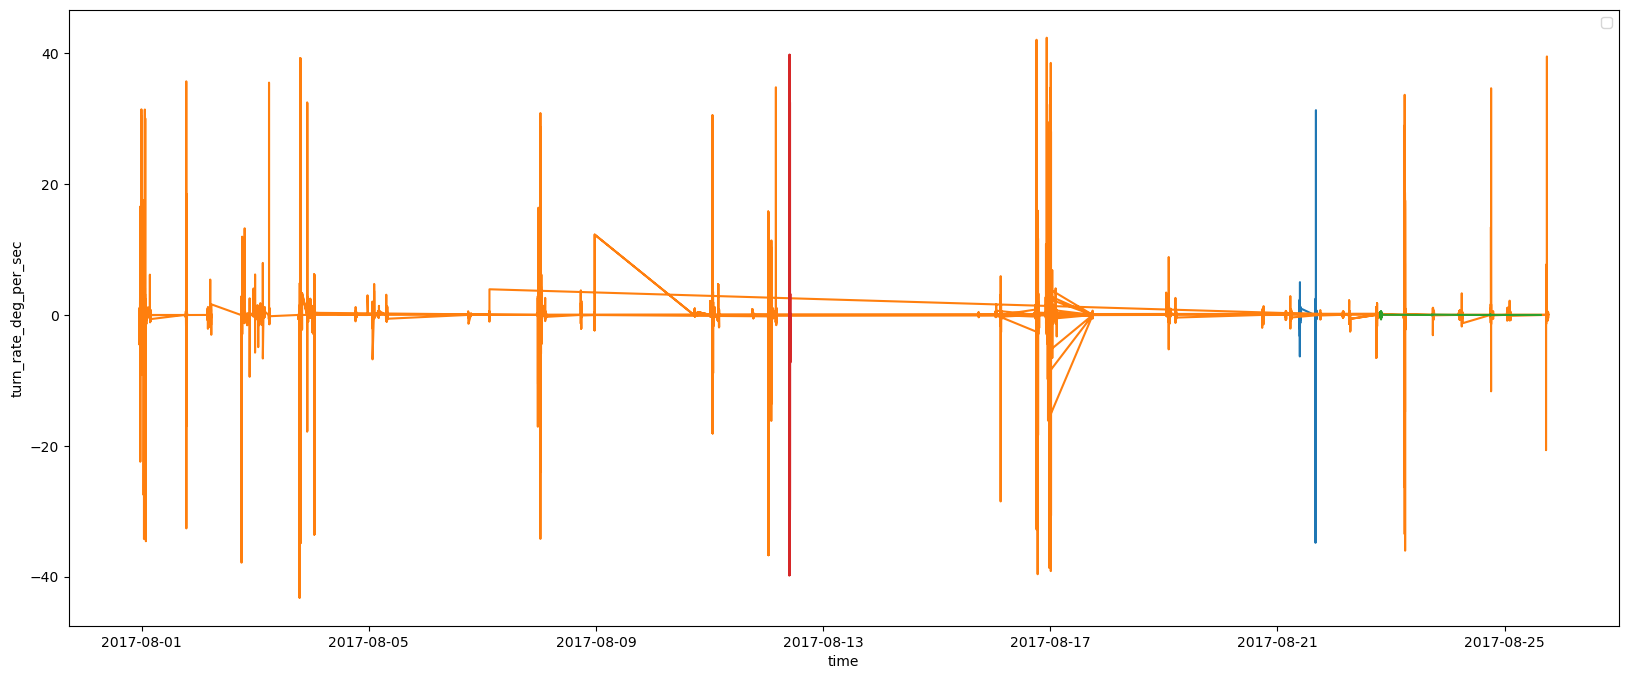

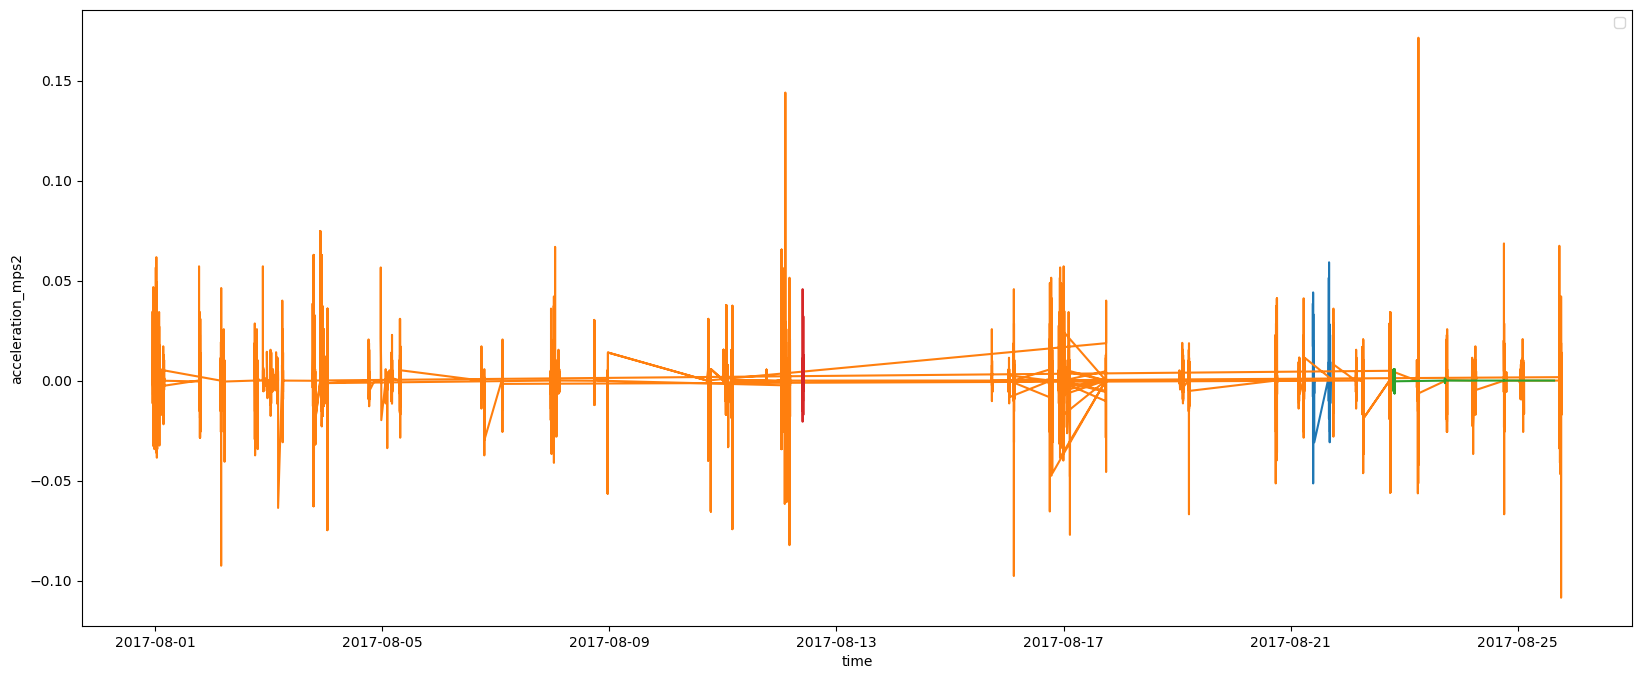

In [60]:
fig,ax_turn_rate = plt.subplots(figsize=(20,8))
fig,ax_acceleration = plt.subplots(figsize=(20,8))
for ship_name in listFishingShip[0:4]:
    df_single = df_dynamic[df_dynamic['vessel_id']==ship_name]
    df_single = df_single[df_single['speed']>0]
    df_single['t'] = pd.to_datetime(df_single['t'],unit='ms')

    df_single = calculateAcceleration(df_single)

    df_single = calculateTurnRate(df_single)
    #exit(0)
    ax_turn_rate.plot(df_single['t'],df_single['turn_rate_deg_per_sec'])
    ax_turn_rate.set_xlabel('time')
    ax_turn_rate.set_ylabel('turn_rate_deg_per_sec')
    ax_turn_rate.legend()
    
    ax_acceleration.plot(df_single['t'],df_single['acceleration_mps2'])
    ax_acceleration.set_xlabel('time')
    ax_acceleration.set_ylabel('acceleration_mps2')
    ax_acceleration.legend()
    print(df_single.describe())  
    #plt.plot(df_single['turn_rate_deg_per_sec'])
    #Statistical Analysis of the per ship data...
plt.show() 

            course      heading  turn_rate_deg_per_sec
count  7125.000000  7125.000000            7124.000000
mean    170.586554    15.571818                    inf
std     110.205443    96.529008                    NaN
min       0.100000  -179.900000             -43.225000
25%      68.700000   -42.500000              -0.155556
50%     143.000000    21.100000               0.000000
75%     273.000000    95.000000               0.160000
max     359.900000   179.900000                    inf
             course       heading  turn_rate_deg_per_sec
count  37756.000000  37756.000000               37743.00
mean     126.858828    -41.546724                    NaN
std       89.730800     92.378775                    NaN
min        2.900000   -172.400000                   -inf
25%       36.500000   -142.600000                  -0.05
50%       73.300000     31.100000                   0.00
75%      216.700000     37.200000                   0.06
max      358.200000    174.100000                

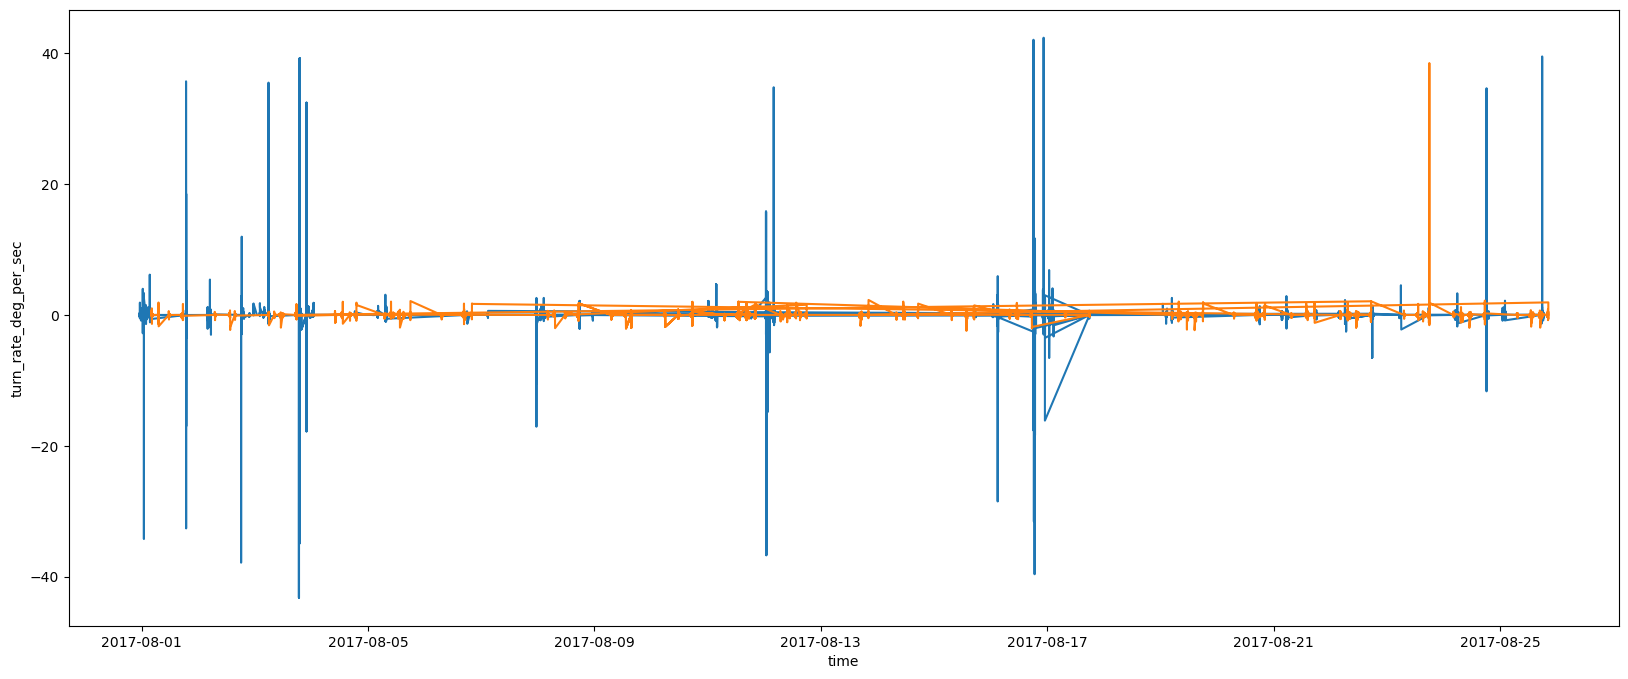

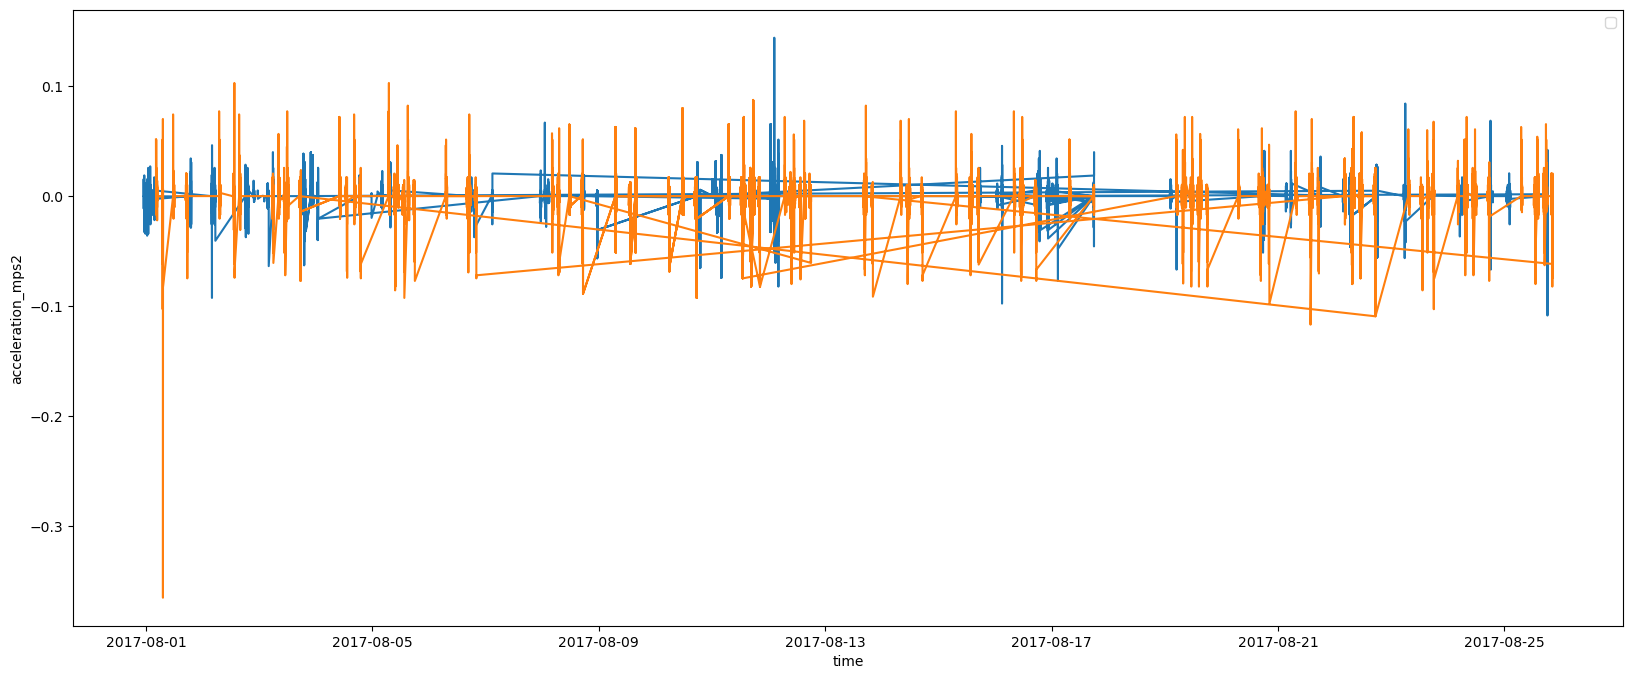

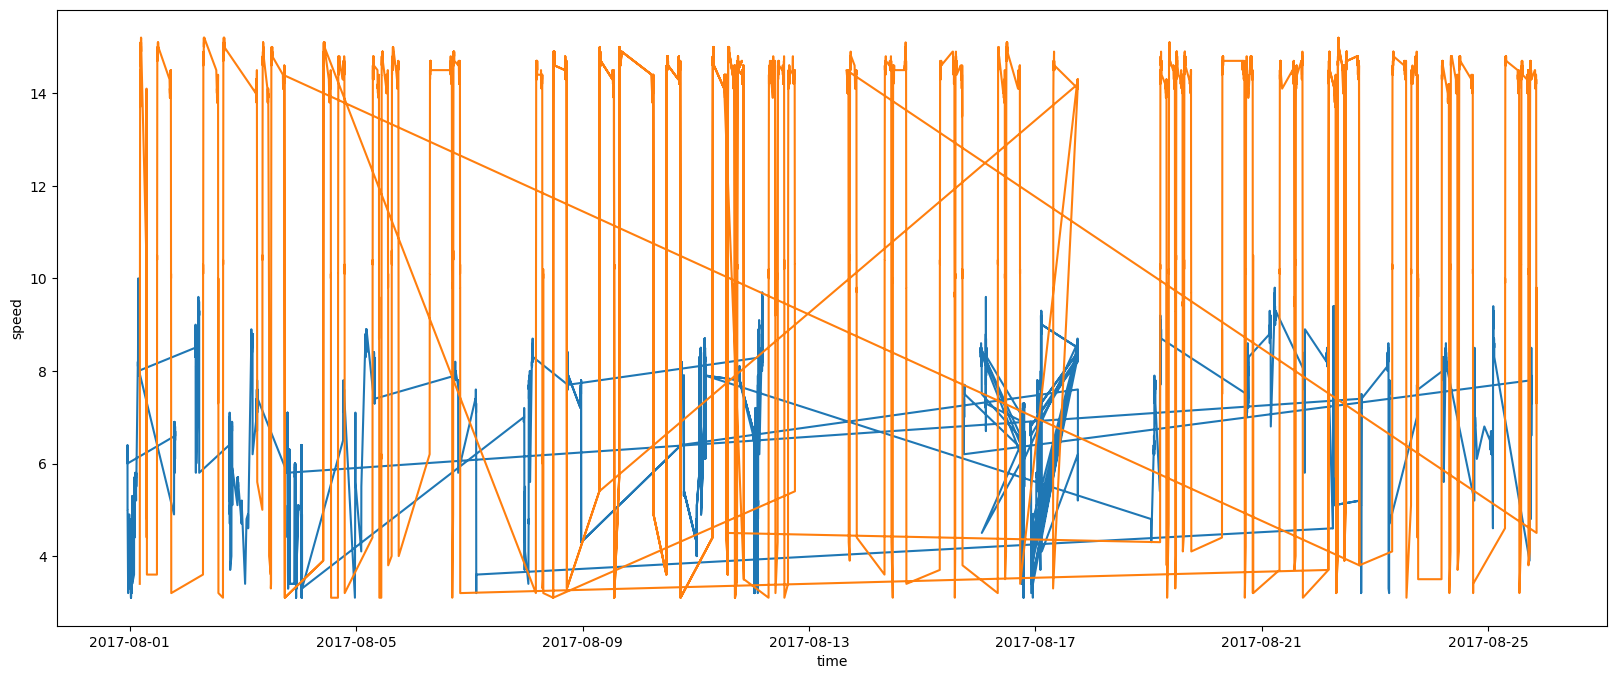

In [61]:
cargoFishingMix = []
fig,ax_turn_rate = plt.subplots(figsize=(20,8))
fig,ax_acceleration = plt.subplots(figsize=(20,8))
fig,ax_speed = plt.subplots(figsize=(20,8))

cargoFishingMix.append(listFishingShip[0])
cargoFishingMix.append(listCargoShip[0])
cargoFishingMix.append(listFishingShip[1])
cargoFishingMix.append(listCargoShip[1])

for ship_name in cargoFishingMix[2:4]:
    df_single = df_dynamic[df_dynamic['vessel_id']==ship_name]
    df_single = df_single[df_single['speed']>3]
    df_single['t'] = pd.to_datetime(df_single['t'],unit='ms')

    df_single = calculateAcceleration(df_single)
    #print(df_single.head())

    df_single = calculateTurnRate(df_single)
    #print(df_single.head())
    #exit(0)
    ax_speed.plot(df_single['t'],df_single['speed'])
    ax_speed.set_xlabel('time')
    ax_speed.set_ylabel('speed')
    
    
    ax_turn_rate.plot(df_single['t'],df_single['turn_rate_deg_per_sec'])
    ax_turn_rate.set_xlabel('time')
    ax_turn_rate.set_ylabel('turn_rate_deg_per_sec')
    #ax_turn_rate.legend(df_static[ship_name]['shiptype']+ship_name)
    ax_acceleration.set_label(ship_name)
    ax_acceleration.legend()
    
    ax_acceleration.plot(df_single['t'],df_single['acceleration_mps2'])
    ax_acceleration.set_xlabel('time')
    ax_acceleration.set_ylabel('acceleration_mps2')
    #ax_acceleration.set_label(df_static[ship_name]['shiptype']+ship_name)
    ax_acceleration.legend()
    print(df_single[['t','course','heading','turn_rate_deg_per_sec']].describe())
    #print(df_single[['t','course','heading','turn_rate_deg_per_sec']].head(10))
    
    
plt.show() 


            course      heading  turn_rate_deg_per_sec
count  7125.000000  7125.000000            7124.000000
mean    170.586554    15.571818                    inf
std     110.205443    96.529008                    NaN
min       0.100000  -179.900000             -43.225000
25%      68.700000   -42.500000              -0.155556
50%     143.000000    21.100000               0.000000
75%     273.000000    95.000000               0.160000
max     359.900000   179.900000                    inf
             course       heading  turn_rate_deg_per_sec
count  37756.000000  37756.000000               37743.00
mean     126.858828    -41.546724                    NaN
std       89.730800     92.378775                    NaN
min        2.900000   -172.400000                   -inf
25%       36.500000   -142.600000                  -0.05
50%       73.300000     31.100000                   0.00
75%      216.700000     37.200000                   0.06
max      358.200000    174.100000                

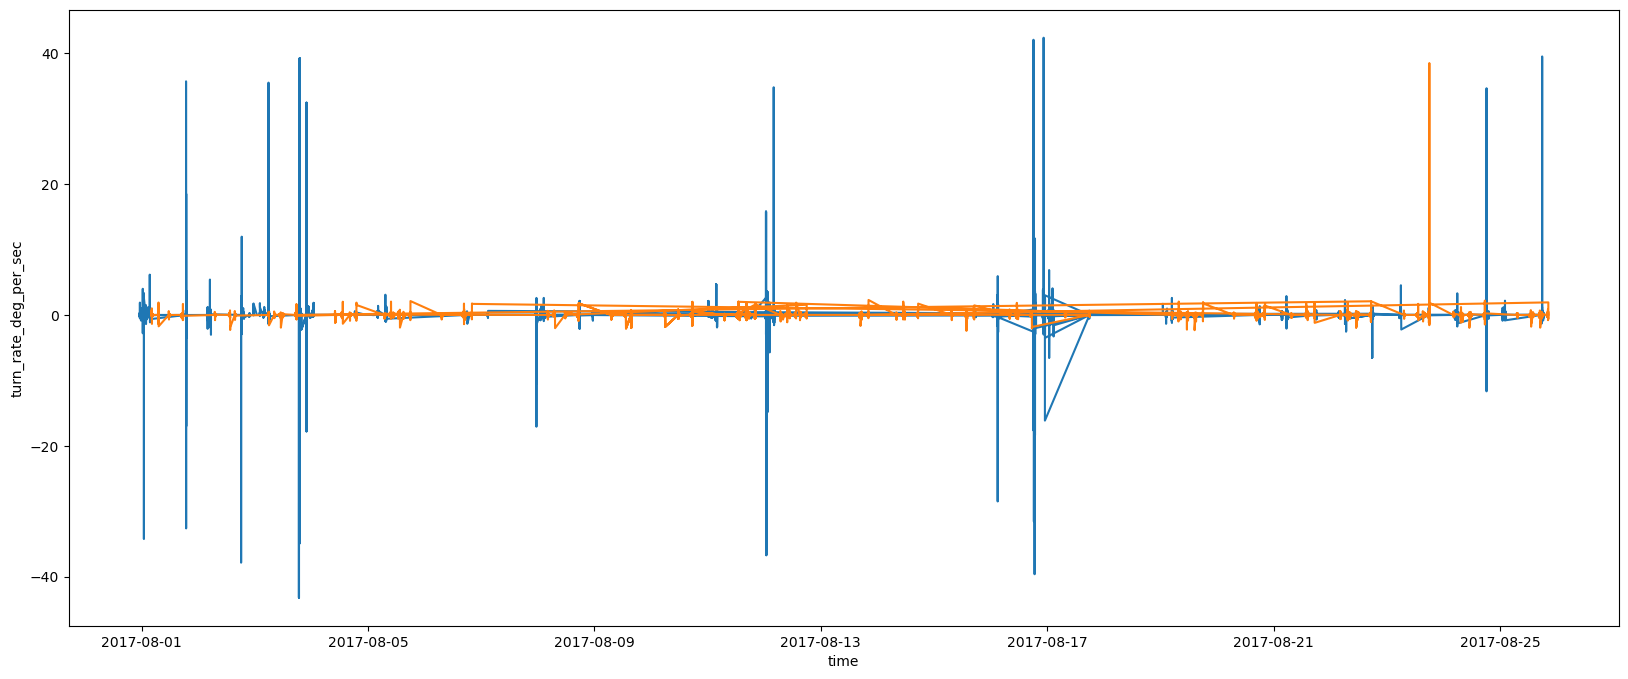

In [62]:
cargoFishingMix = []
fig,ax_turn_rate = plt.subplots(figsize=(20,8))

cargoFishingMix.append(listFishingShip[0])
cargoFishingMix.append(listCargoShip[0])
cargoFishingMix.append(listFishingShip[1])
cargoFishingMix.append(listCargoShip[1])

for ship_name in cargoFishingMix[2:4]:
    df_single = df_dynamic[df_dynamic['vessel_id']==ship_name]
    df_single = df_single[df_single['speed']>3]
    df_single['t'] = pd.to_datetime(df_single['t'],unit='ms')

    df_single = calculateAcceleration(df_single)
    #print(df_single.head())

    df_single = calculateTurnRate(df_single)
    #print(df_single.head())
    #exit(0)
    ax_speed.plot(df_single['t'],df_single['speed'])
    ax_speed.set_xlabel('time')
    ax_speed.set_ylabel('speed')
    
    
    ax_turn_rate.plot(df_single['t'],df_single['turn_rate_deg_per_sec'])
    ax_turn_rate.set_xlabel('time')
    ax_turn_rate.set_ylabel('turn_rate_deg_per_sec')
    #ax_turn_rate.legend(df_static[ship_name]['shiptype']+ship_name)
    ax_acceleration.set_label(ship_name)
    ax_acceleration.legend()
    
    ax_acceleration.plot(df_single['t'],df_single['acceleration_mps2'])
    ax_acceleration.set_xlabel('time')
    ax_acceleration.set_ylabel('acceleration_mps2')
    #ax_acceleration.set_label(df_static[ship_name]['shiptype']+ship_name)
    ax_acceleration.legend()
    print(df_single[['t','course','heading','turn_rate_deg_per_sec']].describe())
    #print(df_single[['t','course','heading','turn_rate_deg_per_sec']].head(10))
    
    
plt.show() 


In [63]:
dfSingleShipFishing =  df_dynamic[df_dynamic['vessel_id']==listFishingShip[0]].head(10)

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

class Subplotter:
    def __init__(self,data):
        self.data=data
        
        
    def create_subplots(self,column1WithRespect,listColumns):
        num_cols = len(listColumns)
        #Calculate the number of rows and columns for the subplots
        num_rows = int(num_cols/2)+(num_cols%2)
        num_cols = 2
        
        fig,axes = plt.subplots(nrows=num_rows,ncols=num_cols,figsize = (20,10))
        
        #Flatten the axes array to easily iterate over the axes array
        
        axes = axes.flatten()
        
        #create a subplot for each column of the dataframe
        
        for i,col in enumerate(listColumns):
            ax = axes[i]
            ax.plot(self.data[column1WithRespect],self.data[listColumns[i]])
            ax.set_title(listColumns[i])
        
        #Remove any unused Subplot
        for i in range (num_cols*num_rows-num_cols+1,num_cols*num_rows):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()

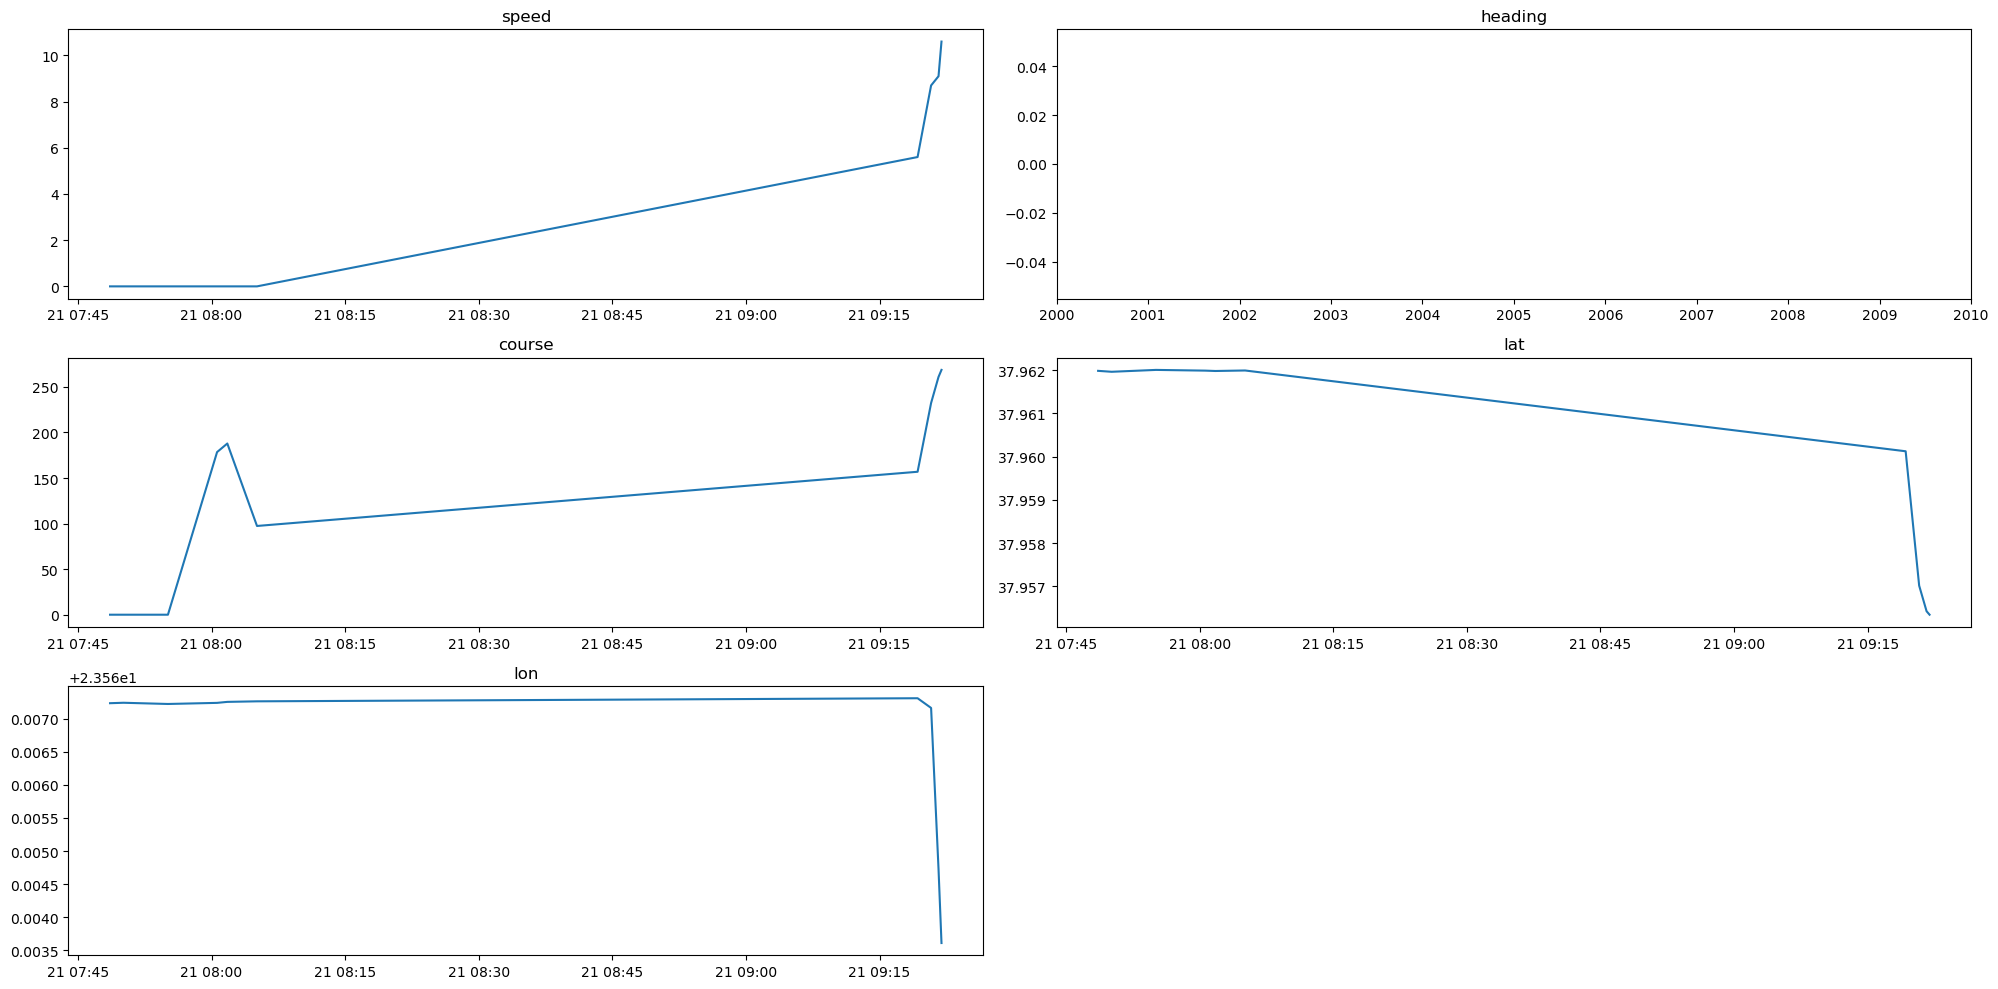

In [65]:
subplotter = Subplotter(dfSingleShipFishing)
dfSingleShipFishing['t'] = pd.to_datetime(dfSingleShipFishing['t'],unit='ms')
subplotter.create_subplots('t',['speed','heading','course','lat','lon'])


#Speed Variatio as per 5 second 10 Second 15 Second

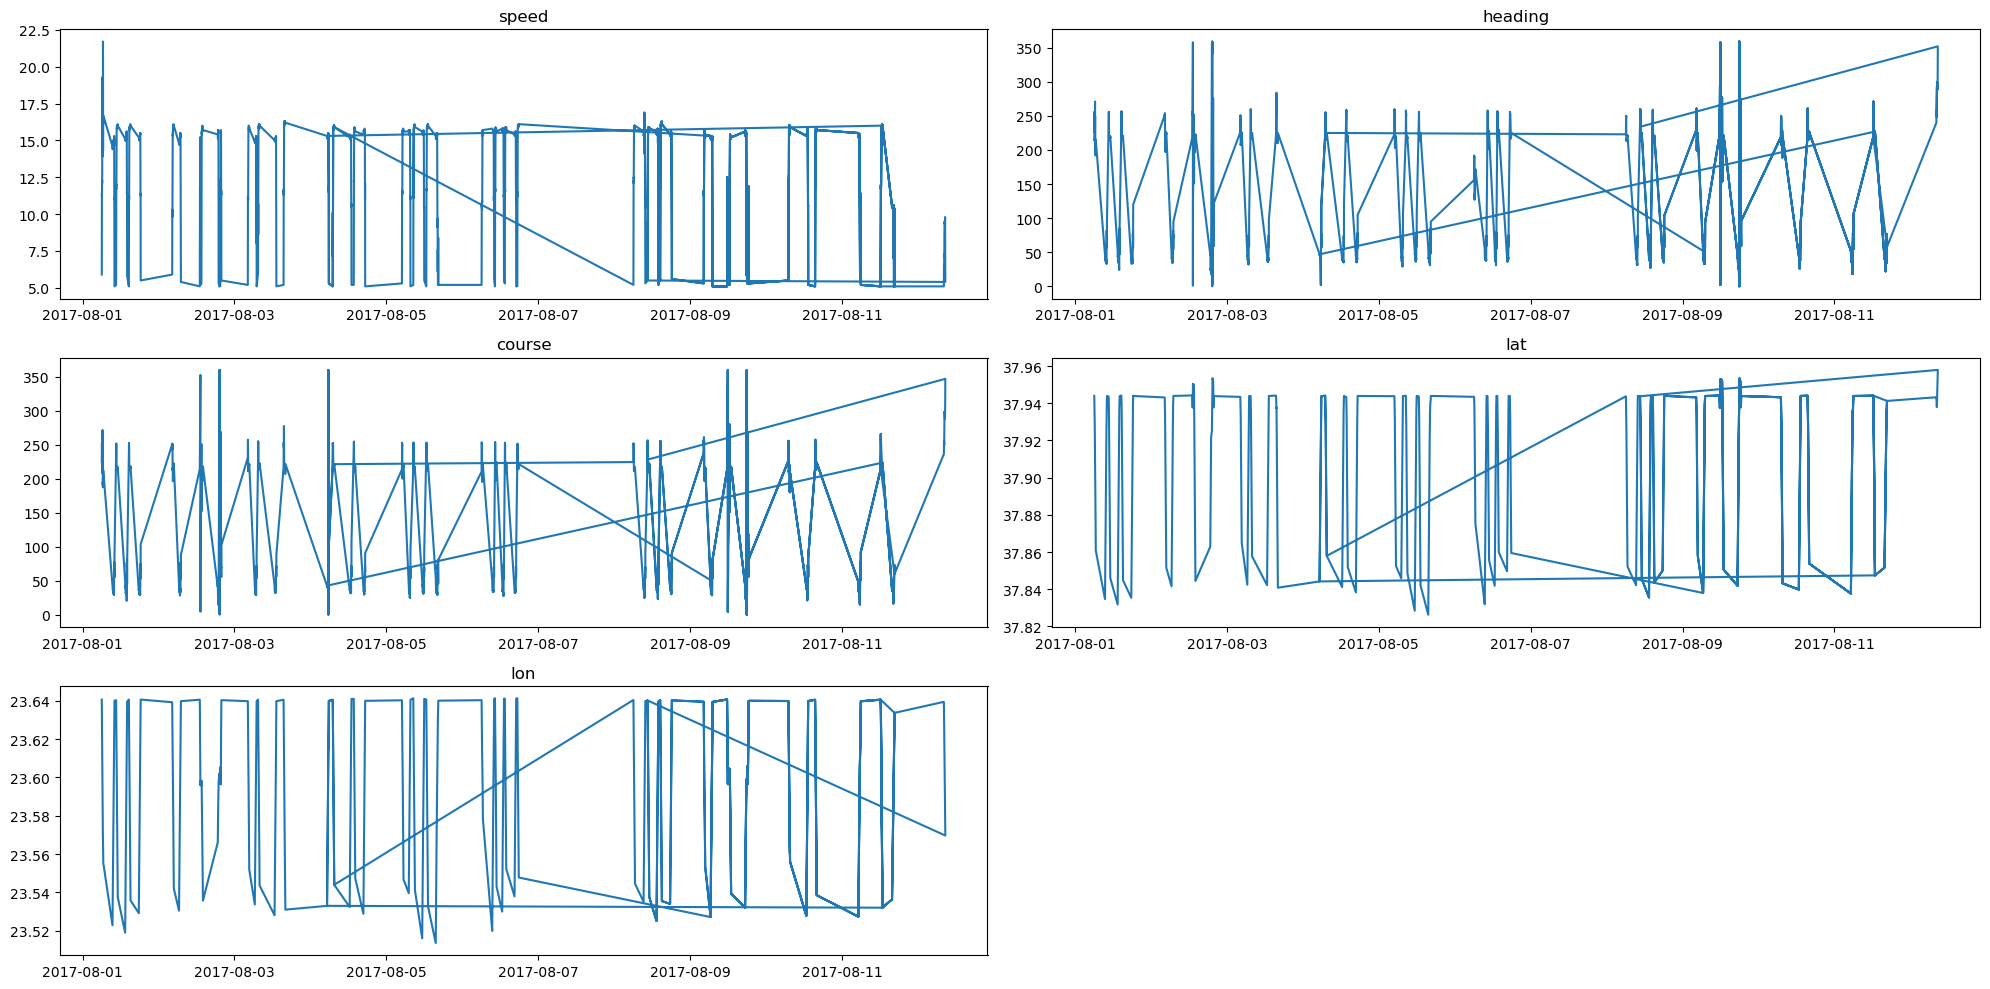

In [66]:
dfSingleShipCargo =  df_dynamic[df_dynamic['vessel_id']==listCargoShip[2]]
dfSingleShipCargo = dfSingleShipCargo[dfSingleShipCargo['speed']>5]
subplotter = Subplotter(dfSingleShipCargo)
dfSingleShipCargo['t'] = pd.to_datetime(dfSingleShipCargo['t'],unit='ms')
subplotter.create_subplots('t',['speed','heading','course','lat','lon'])


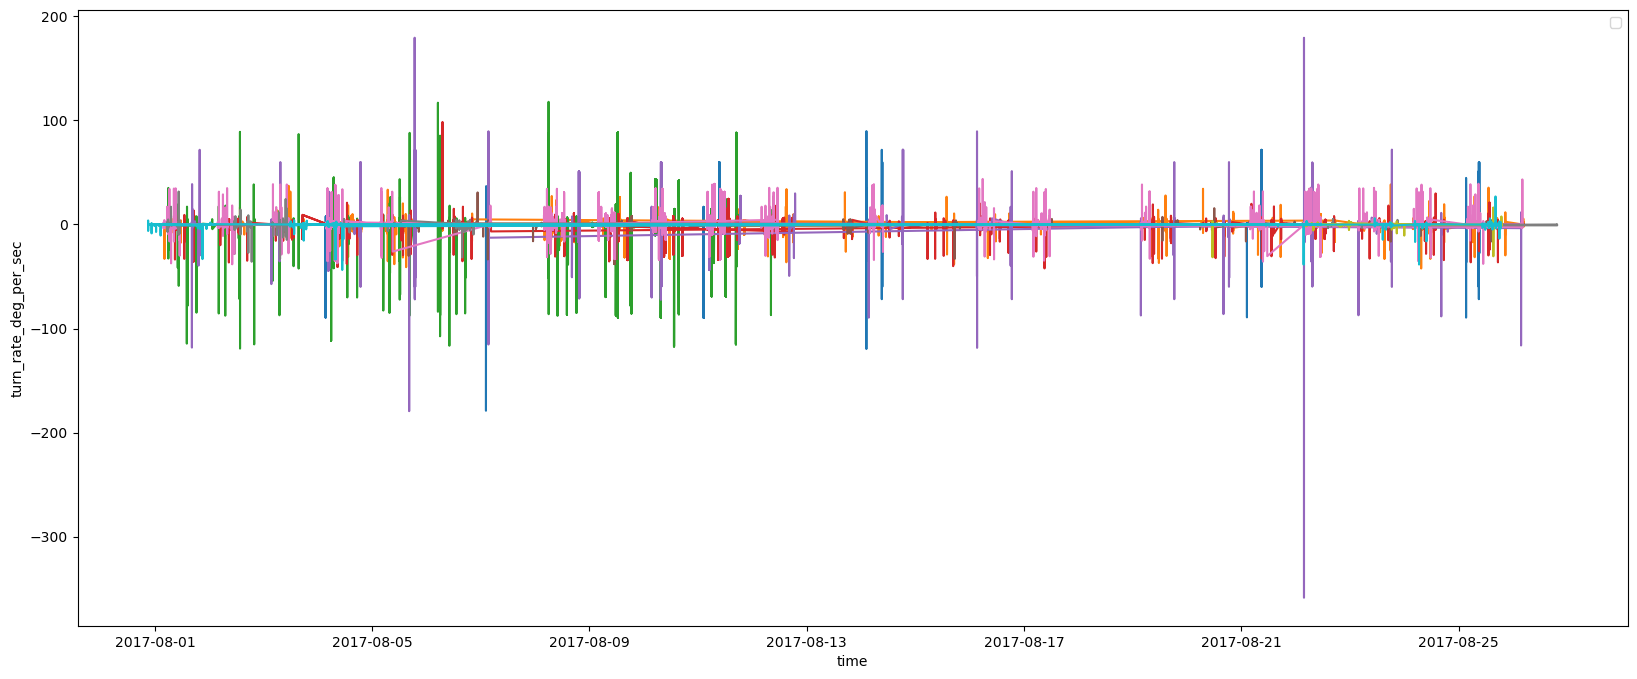

In [67]:
fig,ax = plt.subplots(figsize=(20,8))
for ship_name in listCargoShip[0:10]:
    df_single = df_dynamic[df_dynamic['vessel_id']==ship_name]
    df_single = df_single[df_single['speed']>0]
    df_single['t'] = pd.to_datetime(df_single['t'],unit='ms')
    df_single = calculateTurnRate(df_single)
    #df_single[['turn_rate_deg_per_sec']].plot()
    ax.plot(df_single['t'],df_single['turn_rate_deg_per_sec'])
    ax.set_xlabel('time')
    ax.set_ylabel('turn_rate_deg_per_sec')
    ax.legend()
    #plt.plot(df_single['turn_rate_deg_per_sec'])
    
plt.show() 

In [68]:
#Analyse the speed acceleration and other parameters of a fishing ship....
#make a class to analyze the same and so that the every type of ship can be analysed...

In [69]:
#trajCollectionFishing.add_acceleration(overwrite=True)
# trajCollectionFishing.add_speed(overwrite=True)
# trajCollectionFishing.add_direction(overwrite=True)
#print(trajCollectionFishing.get_max('acceleration'))
#print(trajCollectionFishing.get_max('speed'))
#print(trajCollectionFishing.get_max('direction'))

In [70]:
#trajCollectionCargo.add_acceleration(overwrite=True)
# print(trajCollectionCargo.get_max('speed'))
# print(trajCollectionCargo.get_max('acceleration'))
# print(trajCollectionCargo.get_max('direction'))

In [71]:
# for traj in trajCollectionCargo:
#     print(traj.df.head())

In [72]:
#The statistical analysis can be done with the boxplot of the each of the quantity...

In [73]:
#plotting of the mixup of the parameters of the both classes of ships...
#Suppose there are around n number of trajectories...
#ship must exihibit one type of peroperty...

In [74]:
#The speed variation shipwise needs to be calculated like
#what is the Variation of Speed acceleration and other derivative